In [354]:
#importing dependencies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pickle
from xgboost import XGBClassifier

In [355]:
#data Loading and Understanding
df = pd.read_csv('Customer_Churn.csv')

In [356]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1805,7860-KSUGX,Male,0,Yes,Yes,72,Yes,Yes,DSL,Yes,Yes,Yes,No,No,No,Two year,No,Credit card (automatic),64.45,4720,No
2147,2023-VQFDL,Male,0,No,No,18,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,19.00,348.8,No
206,6348-SNFUS,Male,0,Yes,Yes,72,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,Yes,Two year,Yes,Credit card (automatic),55.45,4179.2,No
4658,8455-HIRAQ,Female,0,No,No,8,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,44.45,369.3,No
5861,9631-RXVJM,Male,0,No,No,35,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.25,677.9,No


In [357]:
df.shape

(7043, 21)

In [358]:
pd.set_option('display.max_columns',None)

In [359]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2118,9779-DPNEJ,Female,0,Yes,Yes,22,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,80.15,1790.65,No
2987,3769-MHZNV,Female,0,Yes,Yes,33,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.10,670.35,No
5178,4350-ZTLPI,Female,0,Yes,No,53,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),108.95,5718.2,No
2236,3420-ZDBMA,Male,1,No,No,5,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,71.45,371.6,No
1504,1769-GRUIK,Female,0,No,No,18,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,71.10,1247.75,No


In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [361]:
 #dropping customer id col as itn not req for modeling
df = df.drop(columns = ['customerID'])

In [362]:
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3555,Male,0,No,No,20,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,85.25,1734.5,Yes
3760,Male,0,No,No,3,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),73.60,232.5,No
3057,Male,0,Yes,Yes,25,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,19.60,411.15,No
1098,Male,0,Yes,Yes,67,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,No,No,One year,No,Electronic check,89.55,6038.55,No
2611,Male,0,Yes,No,10,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.30,738.2,Yes


In [363]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [364]:
#printing unique values in all the col

for col in df.columns:
    print(col,df[col].unique())
    print("-"*50)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
-------

In [365]:
#df['TotalCharges'] = df['TotalCharges'].astype(float)


In [366]:
df[df["TotalCharges"] == " "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [367]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0.0")
df["TotalCharges"] = df["TotalCharges"].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [368]:
#checking the class distribution of target column
print(df["Churn"].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [369]:
# insights
# 1 custid is removed
# 2 no missing val
# 3 missing val in total charges is replaced with 0
# 4 class imbalance identifed in the target 

In [370]:
# EDA

In [371]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [372]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [373]:
#NUMERICAL FEATURE ANALYSIS

In [374]:
# UNDERSTANDING DISTRIBUTION OF THE NUM FEAtures

In [375]:
def plot_hist(df,column_name):
    plt.figure(figsize = (8,5))
    sns.histplot(df[column_name],kde = True)
    plt.title(f"Distribution of {column_name}")
    
    #calc mean and median for col
    col_mean = df[column_name].mean()
    col_median = df[column_name].median()

    #add vertical lines for mean and median
    plt.axvline(col_mean, color = "red",linestyle = "--",label = "Mean")
    plt.axvline(col_median, color = "green",linestyle = "-",label = "Median")
    plt.legend()
    plt.show()

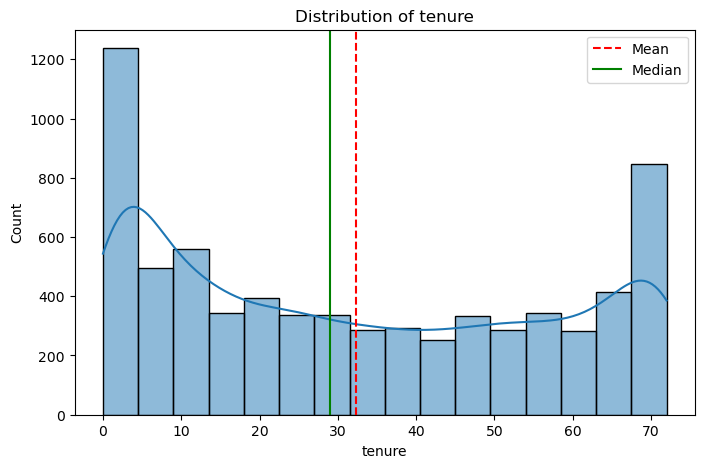

In [376]:
plot_hist(df,"tenure")

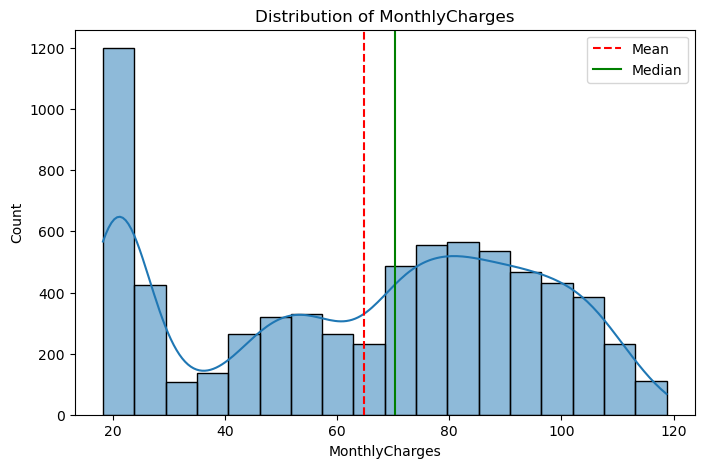

In [377]:
plot_hist(df,"MonthlyCharges")

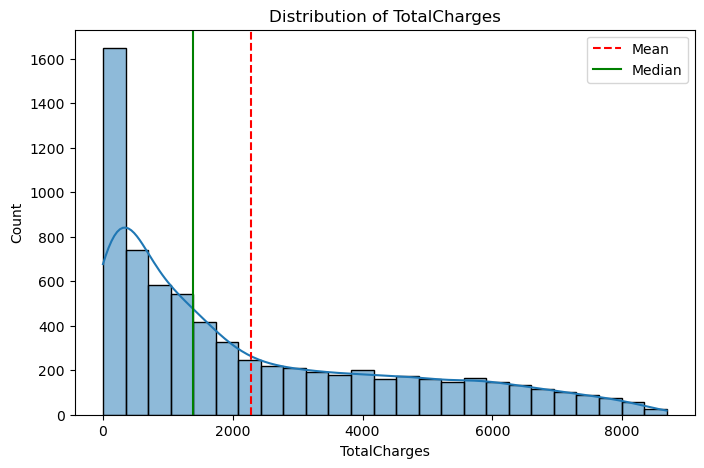

In [378]:
plot_hist(df,"TotalCharges")

In [379]:
# box plot for numerical features
def plot_boxplot(df,column_name):
    plt.figure(figsize = (8,5))
    sns.boxplot(y = df[column_name])
    plt.title(f"BoxPlot of of {column_name}")
    plt.ylabel(column_name)

    plt.show()

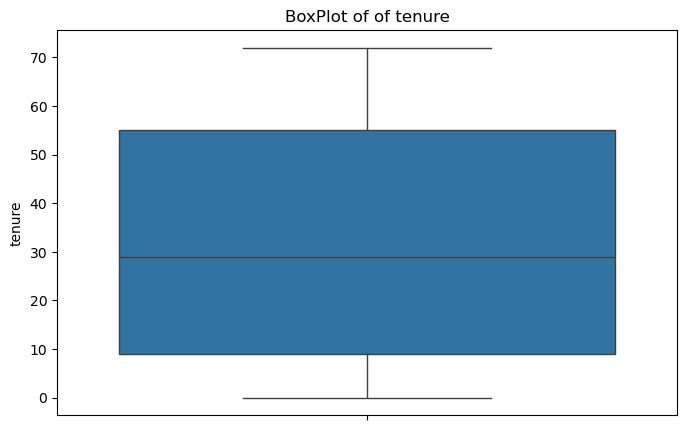

In [380]:
plot_boxplot(df,"tenure")

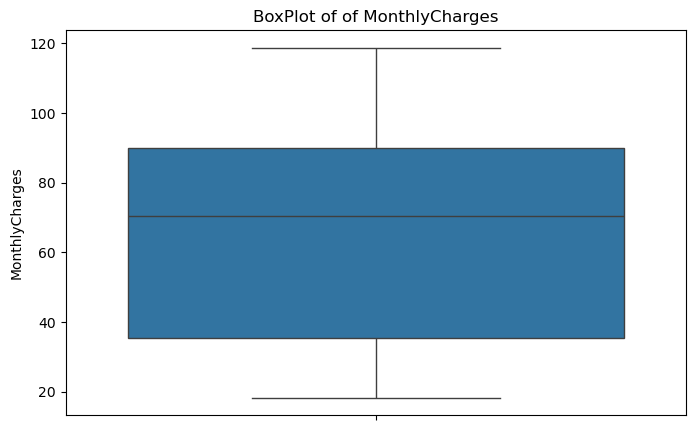

In [381]:
plot_boxplot(df,"MonthlyCharges")

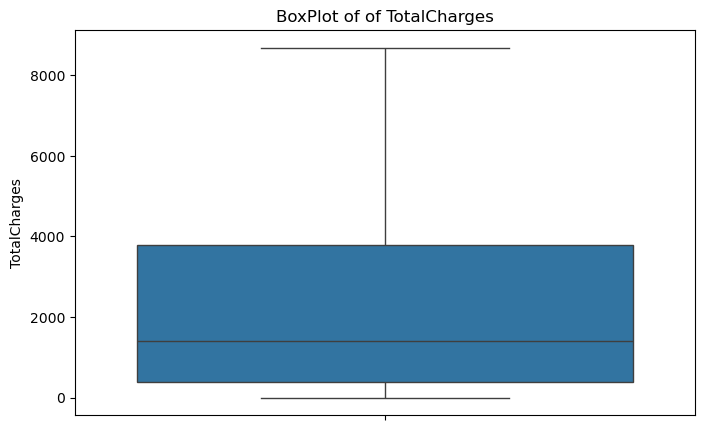

In [382]:
plot_boxplot(df,"TotalCharges")

In [383]:
#CORRELATION HEATMAP FOR NUMERICAL COLS

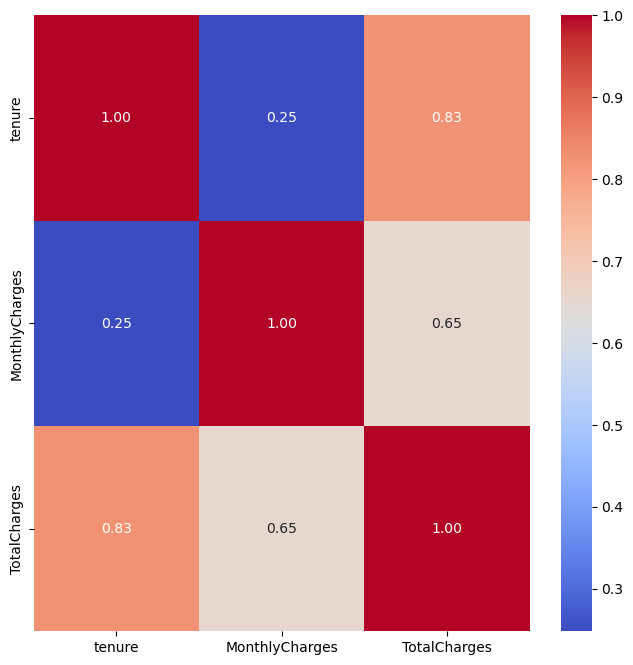

In [384]:
plt.figure(figsize = (8,8))
sns.heatmap(df[["tenure","MonthlyCharges","TotalCharges"]].corr(),annot = True,cmap = "coolwarm", fmt = ".2f")
plt.show()

In [385]:
# Categoriacal col analysis

In [386]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [387]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [388]:
object_cols  = df.select_dtypes(include = 'object').columns.tolist()

In [389]:
object_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [390]:
object_cols = ["SeniorCitizen"] + object_cols

In [391]:
object_cols

['SeniorCitizen',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

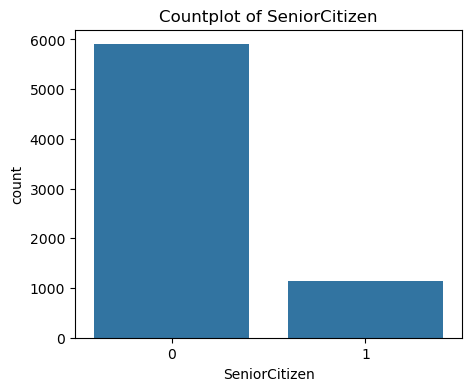

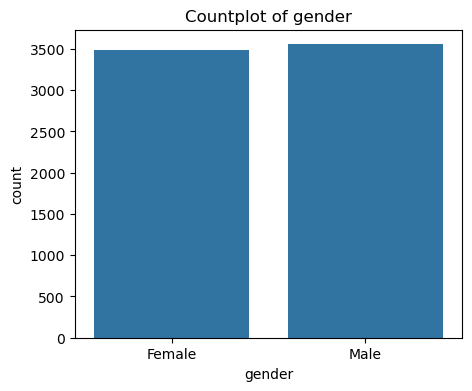

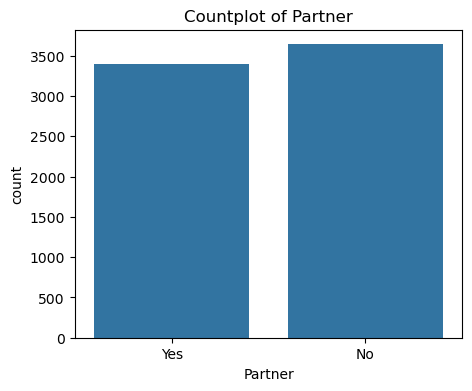

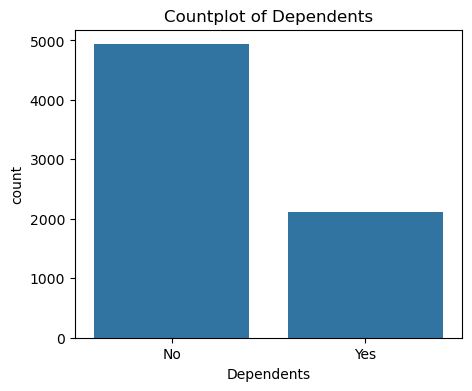

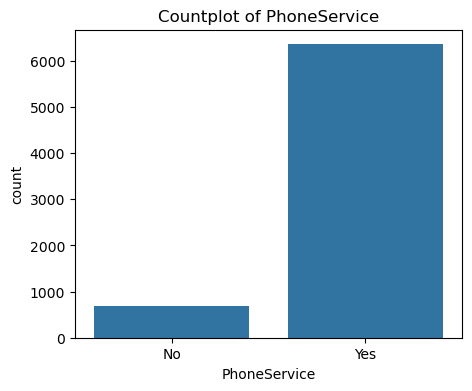

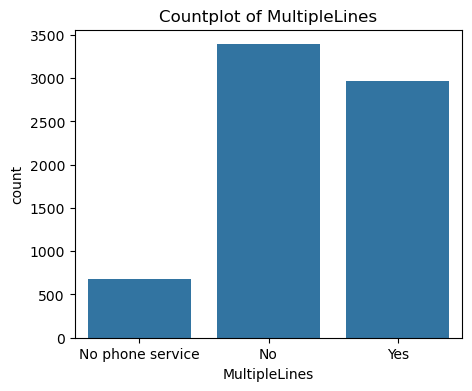

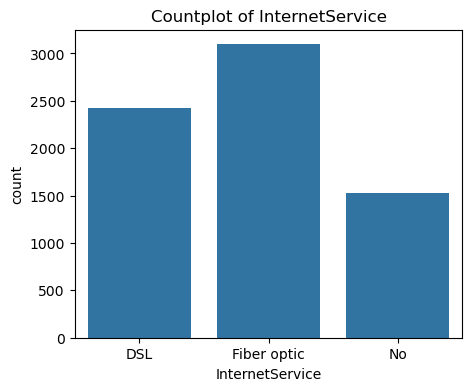

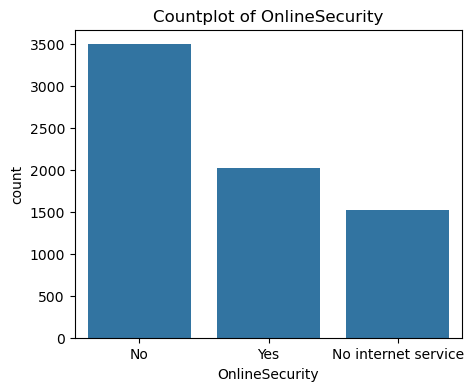

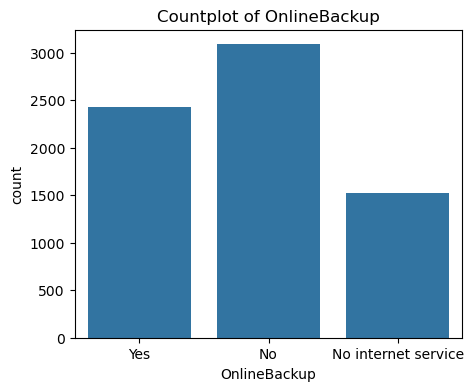

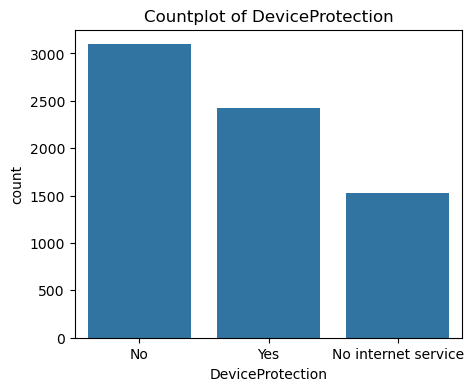

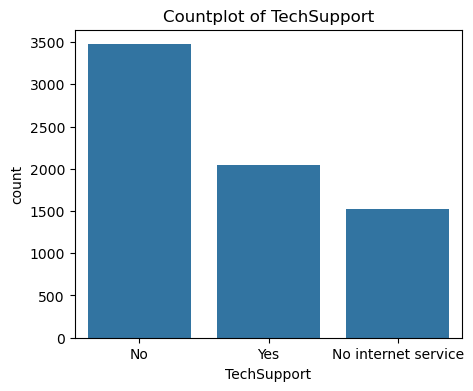

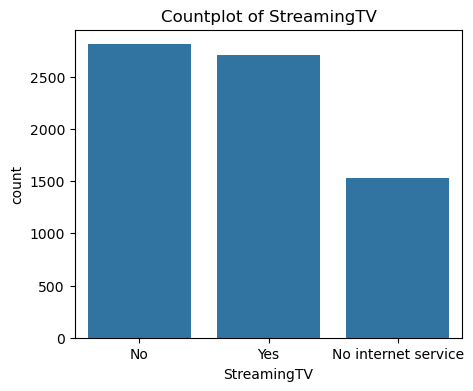

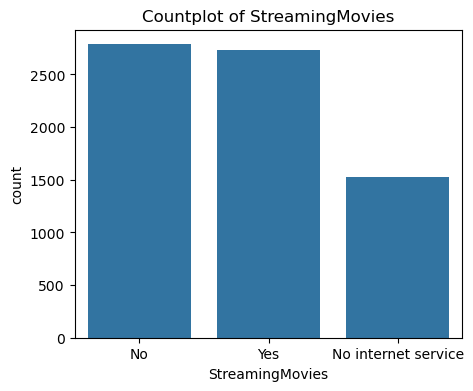

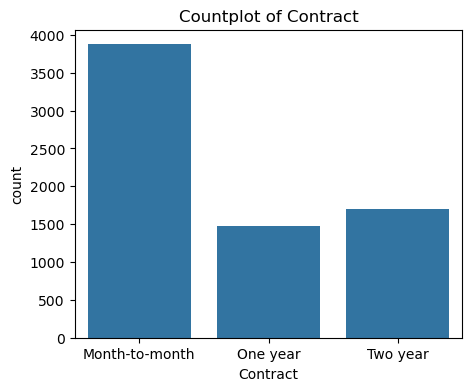

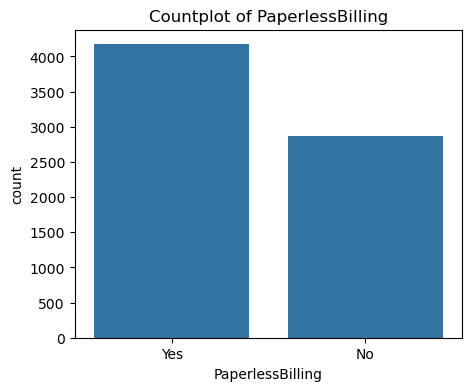

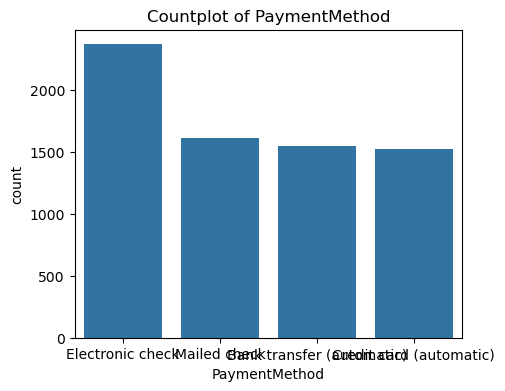

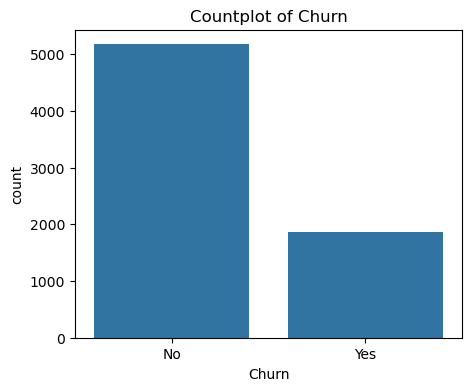

In [392]:
for col in object_cols:
    plt.figure(figsize = (5,4))
    sns.countplot(x = df[col])
    plt.title(f"Countplot of {col}")
    plt.show()

In [393]:
#label encoding of target columndf["Churn"]

In [394]:
df["Churn"] = df["Churn"].replace({"Yes":1,"No":0})

C:\Users\Dell\AppData\Local\Temp\ipykernel_9456\3368294369.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"] = df["Churn"].replace({"Yes":1,"No":0})


In [395]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [396]:
df["Churn"].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [397]:
#identifying col with obj data type
object_columns = df.select_dtypes(include = "object").columns

In [398]:
#initialize a dictionary to save the encoders
encoders = {}

# apply label encoding and store the encoders
for column in object_columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    encoders [column] = label_encoder

# save the encoders to a pickle file
with open("cus_churn_encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)

In [399]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [400]:
X = df.drop(columns = ["Churn"])
y = df["Churn"]

In [401]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42 )

In [402]:
print(y_train.shape)

(5634,)


In [403]:
print(X_train.shape)

(5634, 19)


In [404]:
print(type(y_train))
print(y_train.shape)
print(y_train[:10])
print(np.unique(y_train))


<class 'pandas.core.series.Series'>
(5634,)
2142    0
1623    0
6074    1
1362    1
6754    0
1212    0
2722    0
4006    0
6791    1
5466    0
Name: Churn, dtype: int64
[0 1]


In [405]:
print(y_train.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64


In [406]:
#SYnthetic Minority Oversampling Technique(SMOTE)

In [407]:
smote = SMOTE(random_state=42)

In [408]:
X_train_smote , y_train_smote = smote.fit_resample(X_train,y_train)

In [409]:
print(y_train_smote.shape)

(8276,)


In [410]:
print(y_train_smote.value_counts())

Churn
0    4138
1    4138
Name: count, dtype: int64


In [411]:
#Model Training

In [412]:
# Training with default hyperparameters

In [413]:
#dictionary of models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state = 42),
    "Random Forest": RandomForestClassifier(random_state = 42),
    "XGBoost": XGBClassifier(random_state = 42) 
}

In [414]:
#dictionary to store the cross val results
cv_scores = {}

#perform 5fold cross val for each model
for model_name,model in models.items() :
    print(f"Training {model_name} with default parameters")
    scores = cross_val_score(model,X_train_smote,y_train_smote,cv = 5, scoring = "accuracy")
    cv_scores[model_name] = scores
    print(f"{model_name}cross_val accuracy: {np.mean(scores):.2f}")
    print("-"*70)


Training Decision Tree with default parameters
Decision Treecross_val accuracy: 0.78
----------------------------------------------------------------------
Training Random Forest with default parameters
Random Forestcross_val accuracy: 0.84
----------------------------------------------------------------------
Training XGBoost with default parameters
XGBoostcross_val accuracy: 0.83
----------------------------------------------------------------------


In [415]:
cv_scores

{'Decision Tree': array([0.68115942, 0.71903323, 0.81752266, 0.84350453, 0.84350453]),
 'Random Forest': array([0.72705314, 0.76676737, 0.90453172, 0.89244713, 0.89848943]),
 'XGBoost': array([0.71074879, 0.75226586, 0.90271903, 0.89123867, 0.89909366])}

In [416]:
# random forest gives the highest accuracy compared to other models with default parameters

In [417]:
rfc = RandomForestClassifier(random_state=42)

In [418]:
rfc.fit(X_train_smote,y_train_smote)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [419]:
print(y_test.value_counts())

Churn
0    1036
1     373
Name: count, dtype: int64


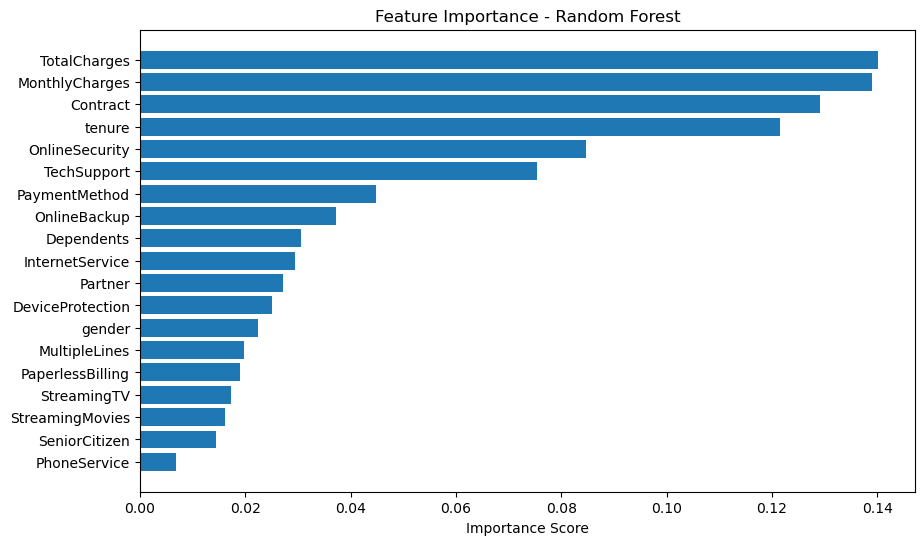

            Feature  Importance
18     TotalCharges    0.140117
17   MonthlyCharges    0.138997
14         Contract    0.129169
4            tenure    0.121609
8    OnlineSecurity    0.084711
11      TechSupport    0.075400
16    PaymentMethod    0.044756
9      OnlineBackup    0.037208
3        Dependents    0.030504
7   InternetService    0.029366


In [420]:
# ===== Feature Importance =====
# get importance scores
importances = rfc.feature_importances_

# attach feature names
feature_names = X.columns

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
})

# sort highest first
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# plot
plt.figure(figsize=(10,6))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.gca().invert_yaxis()
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.show()

# show top 10
print(importance_df.head(10))


In [421]:
#Model Evaluation
#evaluate on test data
y_test_pred = loaded_model.predict(X_test)

print("Accuracy Score", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix", confusion_matrix(y_test, y_test_pred))

print("classification report",classification_report(y_test,y_test_pred))

Accuracy Score 0.7771469127040455
Confusion Matrix [[880 156]
 [158 215]]
classification report               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.58      0.58       373

    accuracy                           0.78      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409



ROC-AUC Score: 0.8217391079321374


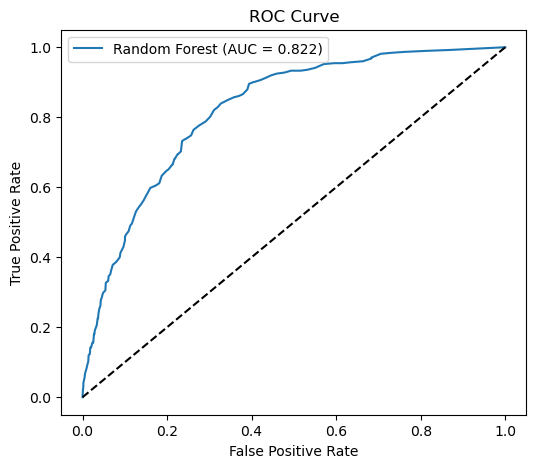

In [422]:
# ===== ROC - AUC Evaluation =====
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# get churn probabilities for ALL test customers
y_prob = loaded_model.predict_proba(X_test)[:,1]

# compute ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# AUC score
auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", auc)

# plot ROC curve
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label="Random Forest (AUC = %0.3f)" % auc)
plt.plot([0,1],[0,1],'k--')  # random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [423]:
#save the trained model as a pickle file

In [424]:
model_data = {"model":rfc,"features_names":X.columns.tolist()}

with open("customer_churn_model.pkl","wb") as f:
    pickle.dump(model_data,f)

In [425]:
#Load the saved model and build a predictive System

# load saved model and features_names

with open("customer_churn_model.pkl","rb") as f:
    model_data = pickle.load(f)

loaded_model = model_data["model"]
features_names = model_data["features_names"]


In [426]:
print(loaded_model)

RandomForestClassifier(random_state=42)


In [427]:
print(features_names)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
